# Подготовимся к анализу данных

In [53]:
import pandas as pd 
import seaborn as sns
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree


df = pd.read_csv('heart.csv')

df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Проверим наш DataFrame на выбросы значений 

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Исходя из результата, можно сделать вывод, что мы готовы

In [5]:
df.target.unique()

array([1, 0], dtype=int64)

# Произведем разбиение нашего DataFrame на test and train 

In [6]:
X = df.drop('target',axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
y = df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


# Настало время учить деревья

In [16]:
clf = DecisionTreeClassifier()
parametrs = {'max_depth':[i for i in range(2,10)],
             'criterion':['gini', 'entropy'],
             'min_samples_split' :[i for i in range(2,10)]
            }

In [17]:
grid_search_tree = GridSearchCV(clf,parametrs,cv=10)
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

# отберем лучший результат 

In [18]:
grid_search_tree.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [19]:
best_classifaer = grid_search_tree.best_estimato

DecisionTreeClassifier(max_depth=2)

[Text(167.4, 181.2, 'X[2] <= 0.5\ngini = 0.486\nsamples = 212\nvalue = [88, 124]'),
 Text(83.7, 108.72, 'X[11] <= 0.5\ngini = 0.398\nsamples = 95\nvalue = [69, 26]'),
 Text(41.85, 36.23999999999998, 'gini = 0.495\nsamples = 42\nvalue = [19, 23]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.107\nsamples = 53\nvalue = [50, 3]'),
 Text(251.10000000000002, 108.72, 'X[7] <= 150.5\ngini = 0.272\nsamples = 117\nvalue = [19, 98]'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 36\nvalue = [12, 24]'),
 Text(292.95, 36.23999999999998, 'gini = 0.158\nsamples = 81\nvalue = [7, 74]')]

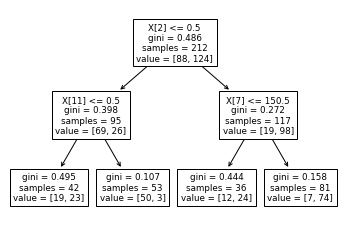

In [21]:
tree.plot_tree(best_classifaer)

In [22]:
accuracy_score(y_test,best_classifaer.predict(X_test))

0.6813186813186813

# Оценим важность каждого из параметров

In [23]:
best_classifaer.feature_importances_

array([0.        , 0.        , 0.69931958, 0.        , 0.        ,
       0.        , 0.        , 0.06373157, 0.        , 0.        ,
       0.        , 0.23694885, 0.        ])

# Ничего не понятно, создадим DataFrame

In [25]:
my_little_df = pd.DataFrame({"Параметры":list(X_train),
                            "Важность фичи":best_classifaer.feature_importances_})

my_little_df

,Параметры,Важность фичи
0,age,0.000000
1,sex,0.000000
2,cp,0.699320
3,trestbps,0.000000
4,chol,0.000000
5,fbs,0.000000
6,restecg,0.000000
7,thalach,0.063732
8,exang,0.000000
9,oldpeak,0.000000


<AxesSubplot:xlabel='Важность фичи', ylabel='Параметры'>

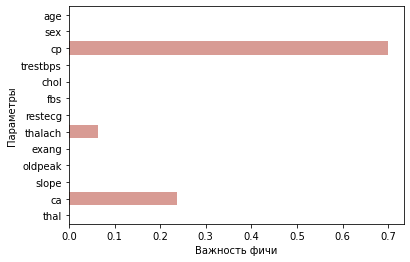

In [37]:
sns.barplot(data = my_little_df, y = 'Параметры', x = 'Важность фичи', color="salmon", saturation=.5)

# Обучим целый лес и сравним  

In [69]:
clf_forest = RandomForestClassifier()
parametrs = {'max_depth':[i for i in range(2,8)],
             'criterion':['gini', 'entropy'],
             'n_estimators' : [i for i in range(2,10)]
            }

In [70]:
grid_search_forest = GridSearchCV(clf_forest,parametrs,cv=10)
grid_search_forest.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9]})

In [71]:
best_forest = grid_search_forest.best_estimator_
best_forest

RandomForestClassifier(max_depth=6, n_estimators=8)

In [72]:
accuracy_score(y_test,best_forest.predict(X_test))

0.8131868131868132

# Оценим важность каждого параметра

In [73]:
my_little_df1 = pd.DataFrame({"Параметры":list(X_train),
                            "Важность фичи":best_forest.feature_importances_})

my_little_df1

,Параметры,Важность фичи
0,age,0.070051
1,sex,0.019891
2,cp,0.197453
3,trestbps,0.054861
4,chol,0.063235
5,fbs,0.010460
6,restecg,0.018791
7,thalach,0.142942
8,exang,0.059664
9,oldpeak,0.092451


<AxesSubplot:xlabel='Важность фичи', ylabel='Параметры'>

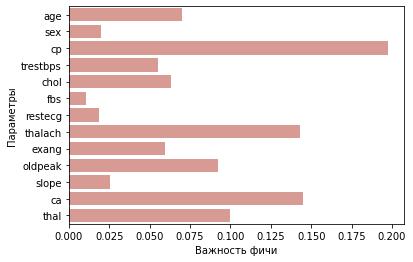

In [74]:
sns.barplot(data = my_little_df1, y = 'Параметры', x = 'Важность фичи', color="salmon", saturation=.5)

# Высчитаем параметры, которые хоть как-то характеризуют нашу модель

In [75]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
%matplotlib inline


In [76]:
precision,recall,_ = precision_recall_curve(y_test,best_forest.predict(X_test))

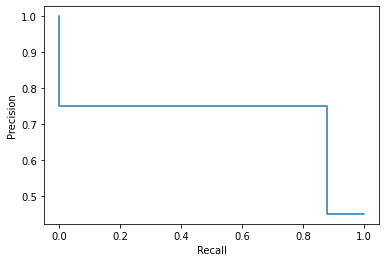

In [77]:
ax = PrecisionRecallDisplay(precision=precision,recall=recall)
ax.plot()

На основании  даннных можно сделать заключение, что модель неплохая

# Заключение по проделанной работе


      Лес справляется с задачей классификации лучше,чем 1 дерево